In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

#cargar datos del pkl
pkl_path = os.path.join(BASE_DIR, 'data_sintetica', 'data_logistica.pkl')
df = pd.read_pickle(pkl_path)

df

,id_envio,peso_kg,distancia_km,tiempo_entrega_hr,numero_paradas,costo_envio_usd,tiempo_almacen_dias
0,1,54.97,346.31,62.0,3,109.01,1.33
1,2,48.62,395.47,57.2,1,62.60,1.79
2,3,56.48,230.07,48.6,5,76.76,2.02
3,4,65.23,328.15,41.5,2,94.34,2.06
4,5,47.66,267.47,55.0,6,93.98,1.91
...,...,...,...,...,...,...,...
495,496,55.39,285.94,68.1,1,100.01,2.44
496,497,39.63,389.88,68.6,7,115.64,1.97
497,498,48.10,332.04,60.1,4,84.18,2.12
498,499,41.24,271.44,58.2,3,84.40,1.85


In [3]:
#preprocesamiento para PCA
df_pca = df.drop(columns=['id_envio'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

In [4]:
#Aplicar el PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#crear DataFrame con componentes y densidades
df_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_result['densidad'] = np.exp(-((df_pca_result['PC1'])**2 + (df_pca_result['PC2'])**2))

In [5]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())

Varianza explicada por cada componente: [0.20243006 0.17482735]
Varianza total explicada: 0.3772574134096685


In [6]:
np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_)

array([0.20243006, 0.37725741, 0.54237502, 0.70013809, 0.85232366,
       1.        ])

In [7]:
#Guardar los resultados en excel
output_excel = os.path.join(BASE_DIR, 'resultado de modelos', 'pca_resultados_logistica.xlsx')
os.makedirs(os.path.dirname(output_excel), exist_ok=True)
df_pca_result.to_excel(output_excel, index=False)

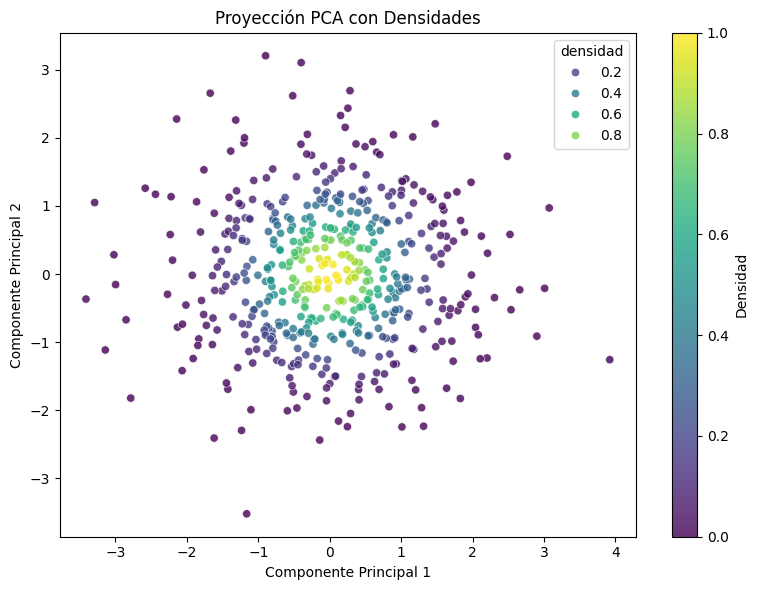

In [8]:
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(data=df_pca_result, x='PC1', y='PC2',
                          hue='densidad', palette='viridis', alpha=0.8)

plt.title('Proyección PCA con Densidades')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter.collections[0], label='Densidad')
plt.tight_layout()